In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

### VaR Breaches (historical VaR)

In [2]:
#Import data
df = pd.read_csv('data.csv')

#Create columns
df["returns"] = np.log(df["SP500"]/df["SP500"].shift(1))
df["fwd 10 day returns"] = np.log(df["SP500"].shift(-10)/df["SP500"])
df["deviations"] = df["returns"].rolling(21).std()
df["10 day deviation"] = np.sqrt(10 * df["deviations"]**2)
df["VaR"] = norm.ppf(0.01)*df["10 day deviation"]

In [3]:
df.dropna().head()

,Date,SP500,returns,fwd 10 day returns,deviations,10 day deviation,VaR
21,21/02/2013,1502.420044,-0.006323,0.027468,0.005969,0.018874,-0.043908
22,22/02/2013,1515.599976,0.008734,0.023205,0.006243,0.019742,-0.045926
23,25/02/2013,1487.849976,-0.018479,0.044928,0.007513,0.023759,-0.055272
24,26/02/2013,1496.939941,0.006091,0.036431,0.007540,0.023842,-0.055465
25,27/02/2013,1515.989990,0.012646,0.025098,0.008028,0.025386,-0.059057


In [4]:
df["Breach"] = np.where( (df["fwd 10 day returns"] < 0) & (df["fwd 10 day returns"] < df["VaR"]), 1, 0)
#Visualize the breaches
df[df["Breach"] == 1]

,Date,SP500,returns,fwd 10 day returns,deviations,10 day deviation,VaR,Breach
135,05/08/2013,1707.140015,-0.001481,-0.036435,0.004627,0.014632,-0.034040,1
141,13/08/2013,1694.160034,0.002772,-0.038313,0.004093,0.012943,-0.030110,1
250,17/01/2014,1838.699951,-0.003903,-0.054088,0.006204,0.019620,-0.045643,1
251,21/01/2014,1843.800049,0.002770,-0.049246,0.005185,0.016396,-0.038144,1
252,22/01/2014,1844.859985,0.000575,-0.051851,0.005175,0.016365,-0.038071,1
379,24/07/2014,1987.979980,0.000488,-0.040241,0.005082,0.016071,-0.037388,1
417,17/09/2014,2001.569946,0.001295,-0.028074,0.003601,0.011387,-0.026491,1
418,18/09/2014,2011.359985,0.004879,-0.032948,0.003595,0.011367,-0.026444,1
425,29/09/2014,1977.800049,-0.002550,-0.053515,0.006015,0.019022,-0.044251,1
426,30/09/2014,1972.290039,-0.002790,-0.049148,0.005971,0.018883,-0.043929,1


In [5]:
var_breach_count = np.sum(df["Breach"])
var_breach_pct = var_breach_count/len(df.dropna())
print(f"VaR breach counts: {var_breach_count} \nVaR breach percentage: {var_breach_pct}")

VaR breach counts: 25 
VaR breach percentage: 0.020508613617719443


In [6]:
df["Consecutive"] = df["Breach"]*df["Breach"].shift(-1)
df[df["Breach"] == 1]

,Date,SP500,returns,fwd 10 day returns,deviations,10 day deviation,VaR,Breach,Consecutive
135,05/08/2013,1707.140015,-0.001481,-0.036435,0.004627,0.014632,-0.034040,1,0.0
141,13/08/2013,1694.160034,0.002772,-0.038313,0.004093,0.012943,-0.030110,1,0.0
250,17/01/2014,1838.699951,-0.003903,-0.054088,0.006204,0.019620,-0.045643,1,1.0
251,21/01/2014,1843.800049,0.002770,-0.049246,0.005185,0.016396,-0.038144,1,1.0
252,22/01/2014,1844.859985,0.000575,-0.051851,0.005175,0.016365,-0.038071,1,0.0
379,24/07/2014,1987.979980,0.000488,-0.040241,0.005082,0.016071,-0.037388,1,0.0
417,17/09/2014,2001.569946,0.001295,-0.028074,0.003601,0.011387,-0.026491,1,1.0
418,18/09/2014,2011.359985,0.004879,-0.032948,0.003595,0.011367,-0.026444,1,0.0
425,29/09/2014,1977.800049,-0.002550,-0.053515,0.006015,0.019022,-0.044251,1,1.0
426,30/09/2014,1972.290039,-0.002790,-0.049148,0.005971,0.018883,-0.043929,1,0.0


In [7]:
consecutive_count = np.sum(df["Consecutive"])
consecutive_pct = consecutive_count/len(df.dropna())
print(f"Consecutive breach counts: {consecutive_count} \nVaR Consecutive breach percentage: {consecutive_pct}")

Consecutive breach counts: 14.0 
VaR Consecutive breach percentage: 0.011484823625922888


Text(0.5, 1.0, '$\\textrm{S\\&P 500 Value at Risk breaches}$')

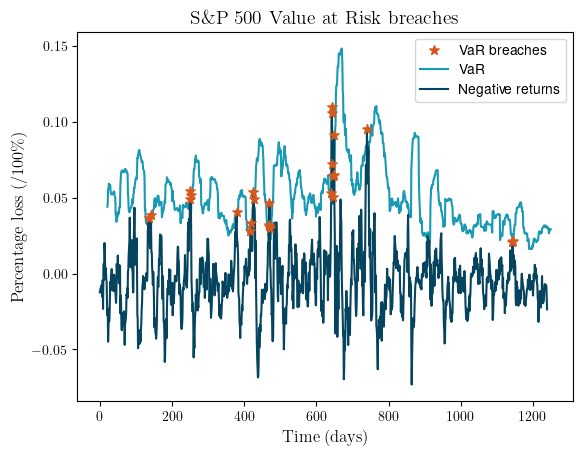

In [9]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
x = np.arange(len(df))
y_1 = -1*df["VaR"]
y_2 = -1*df["fwd 10 day returns"]
x_breaches = df[df["Breach"] ==1].index
y_breaches = df[df["Breach"]==1]["fwd 10 day returns"]*(-1)
plt.scatter(x_breaches, y_breaches, marker = '*', zorder = 10, s=50, c = "#d8581c", label = "VaR breaches")
plt.plot(x, y_1, c = '#189ab4', label = "VaR")
plt.plot(x, y_2, c = '#05445e', label = "Negative returns")
plt.legend(loc='upper right')
plt.xlabel(r"$\textrm{Time (days)}$", fontsize = 12)
plt.ylabel(r"$\textrm{Percentage loss (/100\%)}$", fontsize = 12)
plt.title(r"$\textrm{S\&P 500 Value at Risk breaches}$", fontsize = 14)

## EWMA

In [10]:
ewma_df = pd.read_csv('data.csv')
ewma_df["returns"] = np.log(ewma_df["SP500"]/ewma_df["SP500"].shift(1))
ewma_df["fwd 10 day returns"] = np.log(ewma_df["SP500"].shift(-10)/ewma_df["SP500"])
sigma = ewma_df["returns"].std()

In [11]:
lambda_ = 0.72 
deviations = np.zeros(len(ewma_df))
deviations[1] = sigma
for i in range(len(ewma_df)-2):

    deviations[i+2] = np.sqrt(lambda_*deviations[i+1]**2 + (1-lambda_)*ewma_df["returns"][i+1]**2)

ewma_df["deviations"] = deviations

In [12]:
ewma_df["10 day deviation"] = np.sqrt(10 * ewma_df["deviations"]**2)
ewma_df["VaR"] = norm.ppf(0.01)*ewma_df["10 day deviation"]

In [13]:
ewma_df["Breach"] = np.where( (ewma_df["fwd 10 day returns"] < 0) & (ewma_df["fwd 10 day returns"] < ewma_df["VaR"]), 1, 0)
ewma_df[ewma_df["Breach"] == 1]

,Date,SP500,returns,fwd 10 day returns,deviations,10 day deviation,VaR,Breach
133,01/08/2013,1706.869995,0.012463,-0.027049,0.002255,0.007129,-0.016585,1
141,13/08/2013,1694.160034,0.002772,-0.038313,0.003753,0.011868,-0.027609,1
142,14/08/2013,1685.390015,-0.005190,-0.030379,0.003506,0.011087,-0.025793,1
245,10/01/2014,1842.369995,0.002304,-0.033563,0.003560,0.011257,-0.026187,1
250,17/01/2014,1838.699951,-0.003903,-0.054088,0.006501,0.020557,-0.047822,1
251,21/01/2014,1843.800049,0.002770,-0.049246,0.005890,0.018625,-0.043329,1
252,22/01/2014,1844.859985,0.000575,-0.051851,0.005208,0.016470,-0.038314,1
418,18/09/2014,2011.359985,0.004879,-0.032948,0.004352,0.013761,-0.032012,1
468,28/11/2014,2067.560059,-0.002546,-0.032058,0.002893,0.009147,-0.021280,1
469,01/12/2014,2053.439941,-0.006853,-0.031568,0.002800,0.008854,-0.020597,1


In [14]:
ewma_breach_count = np.sum(ewma_df["Breach"])
ewma_breach_pct = var_breach_count/len(ewma_df.dropna())
print(f"VaR breach counts: {ewma_breach_count} \nVaR breach percentage: {ewma_breach_pct}")

VaR breach counts: 32 
VaR breach percentage: 0.020177562550443905


In [15]:
ewma_df["Consecutive"] = ewma_df["Breach"]*ewma_df["Breach"].shift(-1)
ewma_df[ewma_df["Breach"] == 1]

,Date,SP500,returns,fwd 10 day returns,deviations,10 day deviation,VaR,Breach,Consecutive
133,01/08/2013,1706.869995,0.012463,-0.027049,0.002255,0.007129,-0.016585,1,0.0
141,13/08/2013,1694.160034,0.002772,-0.038313,0.003753,0.011868,-0.027609,1,1.0
142,14/08/2013,1685.390015,-0.005190,-0.030379,0.003506,0.011087,-0.025793,1,0.0
245,10/01/2014,1842.369995,0.002304,-0.033563,0.003560,0.011257,-0.026187,1,0.0
250,17/01/2014,1838.699951,-0.003903,-0.054088,0.006501,0.020557,-0.047822,1,1.0
251,21/01/2014,1843.800049,0.002770,-0.049246,0.005890,0.018625,-0.043329,1,1.0
252,22/01/2014,1844.859985,0.000575,-0.051851,0.005208,0.016470,-0.038314,1,0.0
418,18/09/2014,2011.359985,0.004879,-0.032948,0.004352,0.013761,-0.032012,1,0.0
468,28/11/2014,2067.560059,-0.002546,-0.032058,0.002893,0.009147,-0.021280,1,1.0
469,01/12/2014,2053.439941,-0.006853,-0.031568,0.002800,0.008854,-0.020597,1,1.0


In [16]:
ewma_consecutive_count = np.sum(ewma_df["Consecutive"])
ewma_consecutive_pct = consecutive_count/len(ewma_df.dropna())
print(f"Consecutive breach counts: {ewma_consecutive_count} \nVaR Consecutive breach percentage: {ewma_consecutive_pct}")

Consecutive breach counts: 17.0 
VaR Consecutive breach percentage: 0.011299435028248588


Text(0.5, 1.0, '$\\textrm{S\\&P 500 Value at Risk breaches (EWMA)}$')

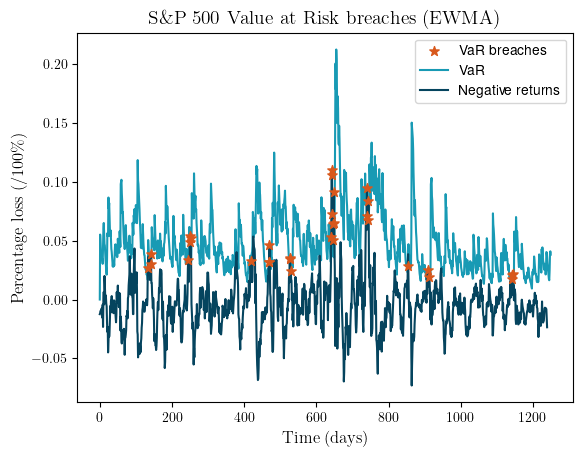

In [17]:
x = np.arange(len(ewma_df))
y_1 = -1*ewma_df["VaR"]
y_2 = -1*ewma_df["fwd 10 day returns"]
x_breaches = ewma_df[ewma_df["Breach"] ==1].index
y_breaches = ewma_df[ewma_df["Breach"]==1]["fwd 10 day returns"]*(-1)
plt.scatter(x_breaches, y_breaches, marker = '*', zorder = 10, s=50, c = "#d8581c", label = "VaR breaches")
plt.plot(x, y_1, c = '#189ab4', label = "VaR")
plt.plot(x, y_2, c = '#05445e', label = "Negative returns")
plt.legend(loc='upper right')
plt.xlabel(r"$\textrm{Time (days)}$", fontsize = 12)
plt.ylabel(r"$\textrm{Percentage loss (/100\%)}$", fontsize = 12)
plt.title(r"$\textrm{S\&P 500 Value at Risk breaches (EWMA)}$", fontsize = 14)